<a href="https://colab.research.google.com/github/fawazdhianabil/PSDS_KelasMahir_PejuangData3.0/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preliminary**

Assalamualaikum Warahmatullahi Wabaraktuh <br>
May we always be given health and protection by the almighty God. <br>
On this occasion i want to try solve a problem that my instructor give to me as final project in Advance Class PSDS. <br>

My name is Muhammad Athanabil Andi Fawazdhia. <br>
Im a student from Mathematic and Computational Science, Universitas Ahmad Dahlan.  <br>

If in this final project if I made a mistake, I hope for corrections and constructive criticism and suggestions. <br>

Thank you very much ! 

##IMPORT LIBRARY

In [1]:
#Import the libraries that you need.
import numpy as np # library for numerical in python.
import pandas as pd # library for data structure & data analysis in python.
import matplotlib.pyplot as plt # library for data visualization in python.
import seaborn as sns # library for data visualization in python.
import time # library for representing time in code. 

from matplotlib.colors import ListedColormap # Library for used to create colarmap objects from a list of colors
from sklearn import datasets # Library for sample dataset
from sklearn.model_selection import train_test_split # Library for spliting data in
from collections import Counter # Library for find most common


##IMPORT DATASET

I use ionoshphere dataset from 

In [2]:
df_ion = pd.read_csv('https://raw.githubusercontent.com/fawazdhianabil/PSDS_KelasMahir_PejuangData3.0/main/ionosphere_data_kaggle.csv')

In [3]:
#show dataset
df_ion

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


##**DATASET PURPOSE**

**The Ionosphere dataset contains features obtained from radar signals focused on the ionosphere layer of the Earth's atmosphere. The task is to determine whether the signal shows the presence of some object, or just empty air.**

##**EXPLORATORY DATASET ANALYS**

In [4]:
#look for dataset dimensions.
df_ion.shape

(351, 35)

(351, 35) means dataset have ***351 rows and 35 columns***

In [5]:
#nformations from dataset.
df_ion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

**We can look that label types is object even though it should be int64, so we can change it to int64 like below :**

In [6]:
#change dtypes label
df_ion.label = pd.factorize(df_ion.label)[0]
print (df_ion)

     feature1  feature2  feature3  ...  feature33  feature34  label
0           1         0   0.99539  ...    0.18641   -0.45300      0
1           1         0   1.00000  ...   -0.13738   -0.02447      1
2           1         0   1.00000  ...    0.56045   -0.38238      0
3           1         0   1.00000  ...   -0.32382    1.00000      1
4           1         0   1.00000  ...   -0.04608   -0.65697      0
..        ...       ...       ...  ...        ...        ...    ...
346         1         0   0.83508  ...    0.90546   -0.04307      0
347         1         0   0.95113  ...    0.91483    0.04712      0
348         1         0   0.94701  ...    0.92697   -0.00577      0
349         1         0   0.90608  ...    0.87403   -0.16243      0
350         1         0   0.84710  ...    0.85764   -0.06151      0

[351 rows x 35 columns]


In [7]:
#look for types each variabel after change
df_ion.dtypes

feature1       int64
feature2       int64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
label          int64
dtype: object

**labels dtypes already change**

##**LOOK FOR STATISTIC**

In [8]:
df_ion.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.358974
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##**LOOK FOR MISSING DATA**

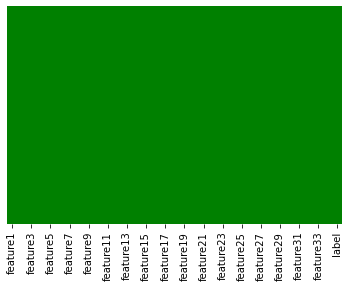

In [9]:
df_ion.isnull().sum() #syntax for find out missing data and sum the total of missing data.
#check for missing data using plot with seaborn library.
sns.heatmap(df_ion.isnull(), cbar=False, yticklabels=False,cmap = 'ocean') # show plot using seaborn.

**There are no missing data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWar

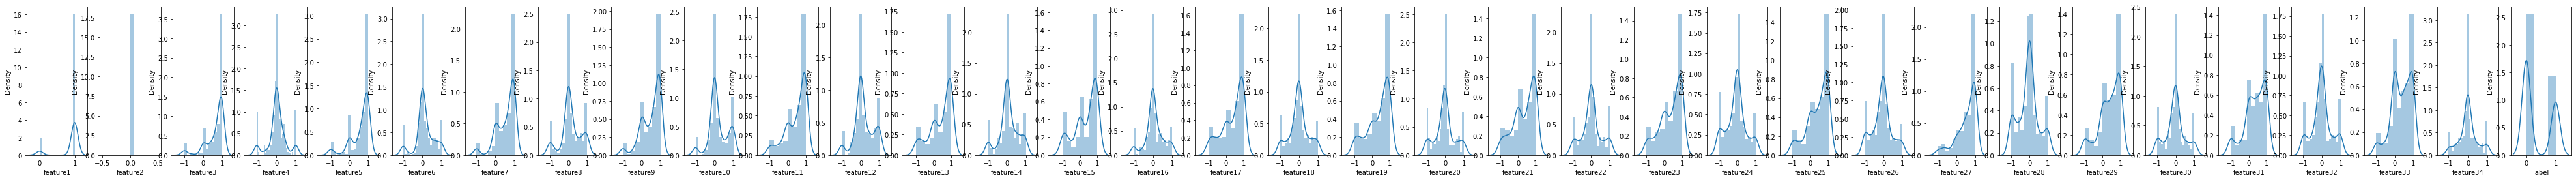

In [10]:
df_2=df_ion.select_dtypes(include=['float64', 'int64'])
l = df_2.columns.values
number_of_columns=len(df_2.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_ion[l[i]],kde=True) 

**Distribution plot shows the data is not normally distributed**

##**DATA PREPROCESSING**

###**NORMALIZE DATA WITH MinMaxScaler**

In [11]:
#Import MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 
#Choose numeric variabels
df_2=df_ion.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)
#show dataset after normalize
df_norm

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1.0,0.0,0.997695,0.470555,0.926215,0.511530,0.916990,0.311460,1.000000,0.518800,0.926215,0.411225,0.798775,0.275275,0.802680,0.308885,0.921780,0.307290,0.791060,0.339040,0.784855,0.351630,0.684730,0.263215,0.784055,0.244145,0.705390,0.269160,0.606330,0.329550,0.711335,0.227565,0.593205,0.273500,0.0
1,1.0,0.0,1.000000,0.405855,0.965175,0.319220,0.445660,0.032015,1.000000,0.477255,0.754370,0.161285,0.672160,0.151465,0.241575,0.012425,0.527495,0.188815,0.665545,0.000000,0.434245,0.273500,0.409720,0.321330,0.398340,0.367155,0.397660,0.407995,0.404800,0.442035,0.416870,0.468560,0.431310,0.487765,1.0
2,1.0,0.0,1.000000,0.483175,1.000000,0.502425,1.000000,0.439690,0.944825,0.505990,0.865410,0.526730,0.927215,0.504135,0.772955,0.501495,0.918875,0.431780,0.877675,0.457300,0.854435,0.362490,0.716925,0.439690,0.787640,0.298900,0.794920,0.389275,0.715500,0.413175,0.802180,0.379100,0.780225,0.308810,0.0
3,1.0,0.0,1.000000,0.274195,1.000000,1.000000,0.856080,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.572580,0.770470,0.303350,0.000000,0.227665,0.150125,1.000000,0.500000,0.500000,1.000000,0.953475,0.758065,1.000000,1.000000,0.399505,0.628410,1.000000,0.338090,1.000000,1.0
4,1.0,0.0,1.000000,0.487995,0.970700,0.532655,0.960530,0.383725,0.885760,0.418005,0.763990,0.398625,0.782045,0.496440,0.671975,0.362715,0.764700,0.391100,0.725535,0.410935,0.529910,0.322125,0.511545,0.235605,0.516430,0.174210,0.566450,0.233970,0.512155,0.189015,0.471465,0.202135,0.476960,0.171515,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,0.917540,0.541490,0.868695,0.426470,0.921745,0.472165,0.952205,0.476890,0.946955,0.565650,0.905985,0.533615,0.896535,0.455355,1.000000,0.489495,0.983195,0.533090,0.938025,0.505775,0.887605,0.533090,0.976890,0.478990,0.917395,0.500615,1.000000,0.564075,0.933300,0.446430,0.952730,0.478465,0.0
347,1.0,0.0,0.975565,0.502095,0.975915,0.486385,0.967190,0.490400,0.972950,0.508030,0.982550,0.516405,0.970855,0.536650,0.973125,0.493370,0.985865,0.500700,0.974170,0.530190,0.963350,0.542060,0.965620,0.550435,0.972600,0.506805,0.967610,0.524625,0.965795,0.540840,0.970330,0.499825,0.957415,0.523560,0.0
348,1.0,0.0,0.973505,0.499830,0.966035,0.483865,0.975885,0.482845,0.977920,0.512230,0.970620,0.508830,0.962975,0.523440,0.969770,0.492695,0.974185,0.510020,0.968920,0.506965,0.957030,0.538385,0.947350,0.530740,0.969940,0.515965,0.962445,0.512710,0.960600,0.511210,0.962295,0.502210,0.963485,0.497115,0.0
349,1.0,0.0,0.953040,0.491715,0.990610,0.490055,0.978455,0.481770,0.928730,0.500550,0.948620,0.483425,0.945305,0.492820,0.953040,0.477350,0.956905,0.495580,0.903865,0.435360,0.943645,0.506075,0.960775,0.488400,0.955250,0.489505,0.945735,0.461200,0.914915,0.413810,0.980110,0.481215,0.937015,0.418785,0.0


###**DIVIDE DATASET INTO DATA TRAINING (80%) & DATA TESTING (20%)**

In [12]:
#determine the value of x and y
y=df_norm['label']
X=df_norm.drop(columns=['label'])

#converting data into an array
y=np.array(y)
X=np.array(X)

#print x & y
print(y)
print(X)

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [13]:
#import train_test_split
from sklearn.model_selection import train_test_split
#divide dataset into x_train, x_test, y_train, y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=4)

##**BUILD DISTANCE FUNCTION**

###**EUCLIDEAN DISTANCE**

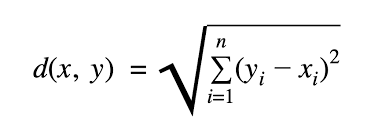

In [14]:
def euclidean_distance(x,y):
  return np.sqrt(sum(pow(a-b, 2) for a, b in zip(x,y)))

euclidean_distance([0,0], [1,1])


1.4142135623730951

###**MANHATTAN DISTANCE**

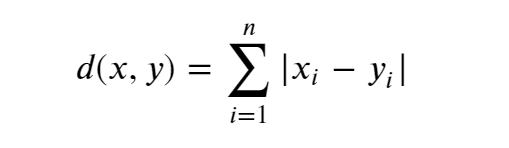

In [15]:
def manhattan_distance(x,y):
  return sum(abs(a-b) for a,b in zip(x,y))

manhattan_distance([0,0], [1,1])


2

###**MINKOWSKI DISTANCE**

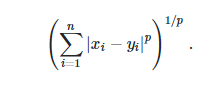

In [16]:
import scipy.spatial.distance as dst
dst.minkowski([0,0], [1,1])


1.4142135623730951

###**CHEBISEV DISTANCE**

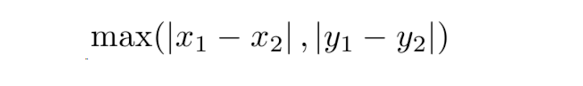

In [17]:
def chebyshev_distance(x,y):
  return max(abs(a-b) for a,b in zip(x,y))

chebyshev_distance([0,0], [1,1])

1

###**BRAY-CURTIS DISTANCE**

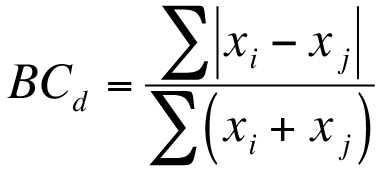

In [18]:
import scipy.spatial.distance as dst
dst.braycurtis([0,0], [1,1])


1.0

###**CANBERRA DISTANCE**

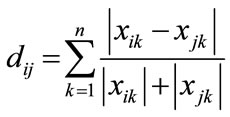

In [19]:
def canberra_distance(x,y):
    return sum(abs(a-b)/(abs(a)+abs(b)) for a, b in zip(x,y))

canberra_distance([0,0], [1,1])

2.0

##**BUILD KNN FUNCTION**

###**KNN WITH EUCLIDIAN**

In [20]:
def _knn_euclidean(x):
  #calculate the distance between the new x and all samples in the training data
  dst = [ euclidean_distance(x, x_train) for x_train in X_train]

  #sorting data and take some k object
  k_idx = np.argsort(dst)[: k]
  
  #taking classes from the k nearest neighbors from the training data
  k_neighbor_labels = [y_train[i] for i in k_idx]
  
  #taking the most appearing class
  most_class = Counter(k_neighbor_labels).most_common(1)
  return most_class[0][0]

def KNN_euclidean(X_train, y_train, k, x_new):
 y_pred= [_knn_euclidean(x_i) for x_i in x_new]
 return np.array(y_pred)

###**KNN WITH MANHATTAN/CITYBLOCK**

In [21]:
def _knn_manhattan(x):
  #calculate the distance between the new x and all samples in the training data
  dst = [manhattan_distance(x, x_train) for x_train in X_train]

  #sorting data and take some k object
  k_idx = np.argsort(dst)[: k]
  
  #taking classes from the k nearest neighbors from the training data
  k_neighbor_labels = [y_train[i] for i in k_idx]
  
  #taking the most appearing class
  most_class = Counter(k_neighbor_labels).most_common(1)
  return most_class[0][0]

def KNN_manhattan(X_train, y_train, k, x_new):
 y_pred= [_knn_manhattan(x_i) for x_i in x_new]
 return np.array(y_pred)


###**KNN WITH MINKOWSKI**

In [22]:
def _knn_minkowski(x): 
  #calculate the distance between the new x and all samples in the training data
  dst1 = [dst.minkowski(x, x_train) for x_train in X_train]

  #sorting data and take some k object
  k_idx = np.argsort(dst1)[: k]
  
  #taking classes from the k nearest neighbors from the training data
  k_neighbor_labels = [y_train[i] for i in k_idx]
  
  #taking the most appearing class
  most_class = Counter(k_neighbor_labels).most_common(1)
  return most_class[0][0]

def KNN_minkowski(X_train, y_train, k,x_new):
 y_pred= [_knn_minkowski(x_i) for x_i in x_new]
 return np.array(y_pred)

###**KNN WITH CHEBISEV**

In [23]:
def _knn_chebyshev(x):
  #calculate the distance between the new x and all samples in the training data
  dst1 = [chebyshev_distance(x, x_train) for x_train in X_train]

  #sorting data and take some k object
  k_idx = np.argsort(dst1)[: k]
  
  #taking classes from the k nearest neighbors from the training data
  k_neighbor_labels = [y_train[i] for i in k_idx]
  
  #taking the most appearing class
  most_class = Counter(k_neighbor_labels).most_common(1)
  return most_class[0][0]

def KNN_chebyshev(X_train, y_train, k, x_new):
 y_pred= [_knn_chebyshev(x_i) for x_i in x_new]
 return np.array(y_pred)

###**KNN WITH BRAY-CURTIS**

In [24]:
def _knn_braycurtis(x):
  #calculate the distance between the new x and all samples in the training data
  
  dst1 = [dst.braycurtis(x, x_train) for x_train in X_train]
  
  #sorting data and take some k object
  k_idx = np.argsort(dst1)[: k]
  
  #taking classes from the k nearest neighbors from the training data
  k_neighbor_labels = [y_train[i] for i in k_idx]
  
  #taking the most appearing class
  most_class = Counter(k_neighbor_labels).most_common(1)
  return most_class[0][0]

def KNN_braycurtis(X_train, y_train, k, x_new):
 y_pred= [_knn_braycurtis(x_i) for x_i in x_new]
 return np.array(y_pred)


###**KNN WITH CANBERRA**

In [25]:
def _knn_canberra(x):
  #calculate the distance between the new x and all samples in the training data
  
  dst = [canberra_distance(x, x_train) for x_train in X_train]
  
  #sorting data and take some k object
  k_idx = np.argsort(dst)[: k]
  
  #taking classes from the k nearest neighbors from the training data
  k_neighbor_labels = [y_train[i] for i in k_idx]
  
  #taking the most appearing class
  most_class = Counter(k_neighbor_labels).most_common(1)
  return most_class[0][0]

def KNN_canberra(X_train, y_train, k, x_new):
 y_pred= [_knn_canberra(x_i) for x_i in x_new]
 return np.array(y_pred)

##**EVALUATION FUNCTION**

###**PLOT FUNCTION**


In [26]:
#Import library
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [27]:
def bar_plot(df, evalf):
 sns.set_theme(style="whitegrid")
 fig, ax=plt.subplots(figsize=(10,8)) 
 ax = sns.barplot(data=df, y=evalf, x=df.index )

 for bar in ax.patches:
   ax.annotate(format(bar.get_height(), '.2f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=15, xytext=(0, 8),
               textcoords='offset points')

 plt.xticks(rotation=80)
 ax.set_xlabel('distance')
 ax.set_ylabel('{} score'.format(evalf))
 ax.set_title('Evaluation Score of KNN with Various Distance', fontsize=16)
 plt.show()


###**EXPERIMENT**


In [28]:
# Parameter
k=3

In [29]:
# KNN Euclidean Distance
start = time.time()
y_pred=KNN_euclidean(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start
# Evaluation
euclidean =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]

euclidean


[0.8591549295774648,
 0.8826291079812207,
 0.8591549295774648,
 0.8435499359795134,
 0.7043569087982178]

In [30]:
# KNN Manhattan Distance
start = time.time()
y_pred=KNN_manhattan(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start
# Evaluation
manhattan =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]
 
manhattan

[0.8873239436619719,
 0.9028654686741135,
 0.8873239436619719,
 0.8782411243057473,
 0.4489877223968506]

In [31]:
# KNN Minkowski Distance
start = time.time()
y_pred=KNN_minkowski(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start
# Evaluation
minkowski =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]
 
minkowski

[0.8591549295774648,
 0.8826291079812207,
 0.8591549295774648,
 0.8435499359795134,
 0.2564728260040283]

In [32]:
# KNN Chebishev Distance
start = time.time()
y_pred=KNN_chebyshev(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start
# Evaluation
chebyshev =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]
 
chebyshev

[0.9154929577464789,
 0.9245472837022132,
 0.9154929577464789,
 0.9108424129683763,
 0.4093196392059326]

In [33]:
# KNN BrayCurtis Distance
start = time.time()
y_pred=KNN_braycurtis(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start
# Evaluation
braycurtis =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]
 
braycurtis

[0.8732394366197183,
 0.892575793745524,
 0.8732394366197183,
 0.8611871395176732,
 0.31884264945983887]

In [34]:
# KNN Canberra Distance
start = time.time()
y_pred=KNN_canberra(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start
# Evaluation
canberra =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]
 
canberra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.704225352112676,
 0.4959333465582225,
 0.704225352112676,
 0.5820044232336166,
 0.909311056137085]

##**EVALUATION**

In [35]:
#creating dataframe
df = pd.DataFrame([euclidean,
 manhattan,
 minkowski,
 chebyshev,
 braycurtis,
 canberra],
 columns = ['accuracy','precision', 'recall', 'f1', 'time'],
 index = ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'braycurtis', 'canberra'])

In [36]:
#show dataframe
df

,accuracy,precision,recall,f1,time
euclidean,0.859155,0.882629,0.859155,0.843550,0.704357
manhattan,0.887324,0.902865,0.887324,0.878241,0.448988
minkowski,0.859155,0.882629,0.859155,0.843550,0.256473
chebyshev,0.915493,0.924547,0.915493,0.910842,0.409320
braycurtis,0.873239,0.892576,0.873239,0.861187,0.318843
canberra,0.704225,0.495933,0.704225,0.582004,0.909311


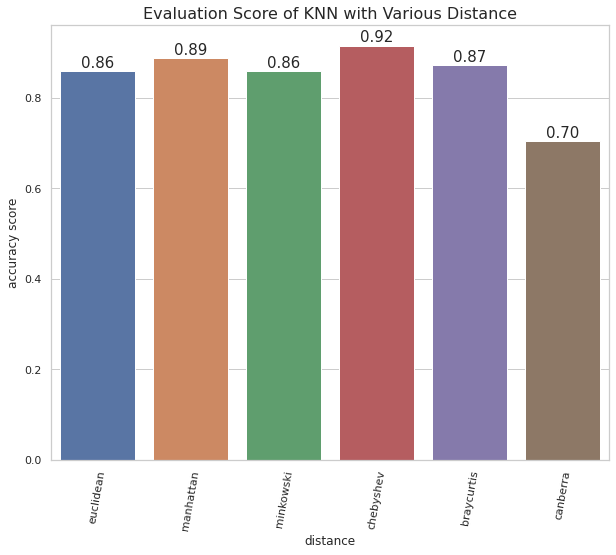

In [37]:
#compare accuracy each distance
bar_plot(df, 'accuracy')

**Accuracy classification score.** <br>

**In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.**

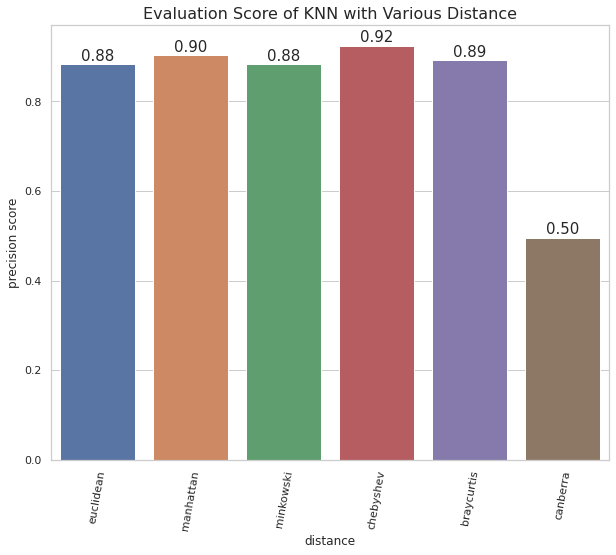

In [38]:
#compare precision each distance
bar_plot(df, 'precision')

**Compute the precision.** <br>

**The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.** <br>

**The best value is 1 and the worst value is 0.** <br>

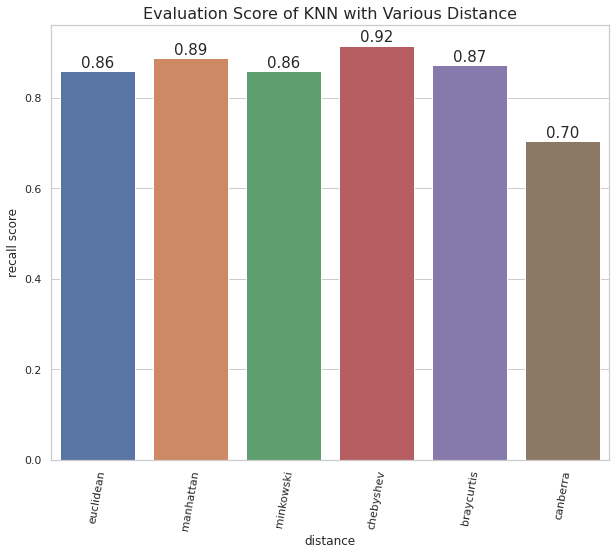

In [39]:
#compare recall each distance
bar_plot(df, 'recall')

**Compute the recall.** <br>

**The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.** <br>

**The best value is 1 and the worst value is 0.** <br>

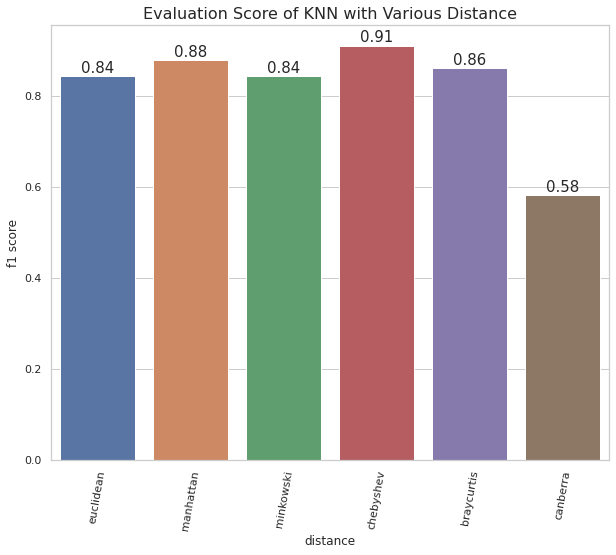

In [40]:
#compare f1 each distance
bar_plot(df, 'f1')

**Compute the F1 score, also known as balanced F-score or F-measure.** <br>

**The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:** <br>

**F1 = 2 (precision x recall) / (precision + recall)** <br>

**In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.**

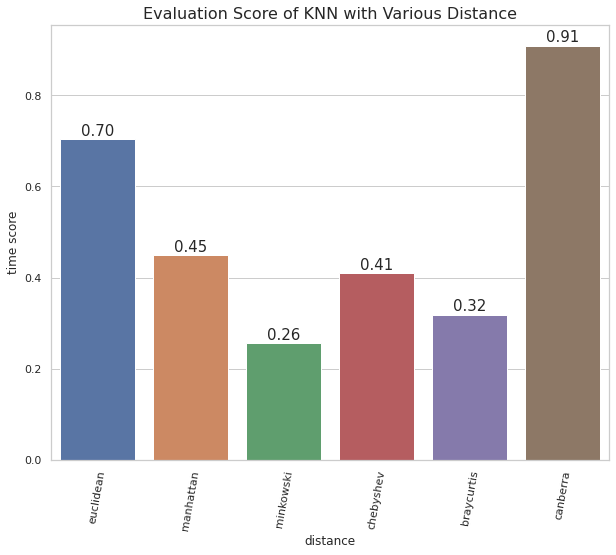

In [41]:
#compare time each distance
bar_plot(df, 'time')

**The concept of time is the time it takes the model to complete each iteration of the model with different distances**

#**CONCLUSION**

**The conclusions I can get are:** <br>
<ol type="A">
<li>Chebyshev distances that have been applied to the ionosphere dataset were found to be better than other distances based on "accuracy", "precision", "recall", "f1". </li>
<li> Minkowski distance is faster than other distance based on "time". </li>
</ol>

#**END**

**This is the end of the notebook that I compiled to meet the final project (mini project) on PSDS Mid Semester Test.** <br>

**Thanks to Allah SWT, parents, family and friends in PSDS who have helped me and also my instructor in PSDS, Joko Eliyanto, S.Si., M.Pd. who helped in imparting knowledge to me.**

#**REFERENCES**


Sigillito, V. G., Wing, S. P., Hutton, L. V., \& Baker, K. B. (1989).
Classification of radar returns from the ionosphere using neural
networks. Johns Hopkins APL Technical Digest, 10, 262-266. <br>

Modules from my Instructor and Pusat Studi Data Sains Universitas Ahmad Dahlan. <br>

https://stackoverflow.com/ <br>

https://www.kaggle.com/creepyghost/uci-ionosphere <br>

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html <br>

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html <br>

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html <br>

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>



